<a href="https://colab.research.google.com/github/MaulidinZakaria/16_MaulidinZakaria/blob/main/Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pertanyaan :**

1.	Jelaskan, mengapa pada modul praktikum ini eksekusi kode Python dilakukan
menggunakan Google Colab?

2.	Jelaskan mengenai kegunaan setiap library pada praktikum langkah ke delapan? Apakah semua library tersebut harus digunakan dalam praktikum sesi ini?

3.	Pada uji coba langkah ke-9 terdapat potongan kode program sebagai berikut :
Apa kegunaan kode program tersebut?dan apa pengaruhnya jika tidak dilakukan?

4.	Perhatikan potongan kode progam berikut :
Apakah kegunaan kode [255,255,255] ? Jelaskan!

5.	Jelaskan keterkaitan antara pixel dan juga resolusi gambar yang tinggi ataupun rendah!

**Jawaban :**

1. Hal tersebut dikarenakan pada Google Colab dapat digunakan untuk membuat file yang bertipe .ipynb, file tersebut merupakan file Jupiter Notebook yang memuat bahasa pemrograman python. Selain itu, Google Colab juga dapat langsung mengeksekusi dan memvisualisasikan dari kode program yang telah dibuat.

2. -	Numpy merupakan library yang digunakan untuk manipulasi array
  -	Pandas merupakan library yang digunakan untuk manipulasi dan analisis suatu data.
  -	OpenCV merupakan library yang digunakan untuk pemrosesan gambar dan video
  -	Skimage merupakan library yang menyediakan berbagai algoritma untuk pemrosesan gambar
  -	Matplotlib merupakan library yang digunakan untuk visualisasi data dalam bentuk grafik dan plot

3. Kode tersebut digunakan untuk merubah ukuran tinggi serta lebar gambar menjadi setengahnya, dan apabila tidak dilakukan tidak terlalu mempengaruhi hasilnya.

4. Kode tersebut digunakan untuk menciptakan warna putih.

5. Semakin tinggi resolusi suatu gambar, semakin banyak pixel yang digunakan untuk merepresentasikan gambar tersebut, sehingga menghasilkan kualitas gambar yang lebih baik. Sebaliknya, resolusi yang rendah akan menghasilkan gambar yang kurang tajam dan detail.

In [1]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pylab as plt

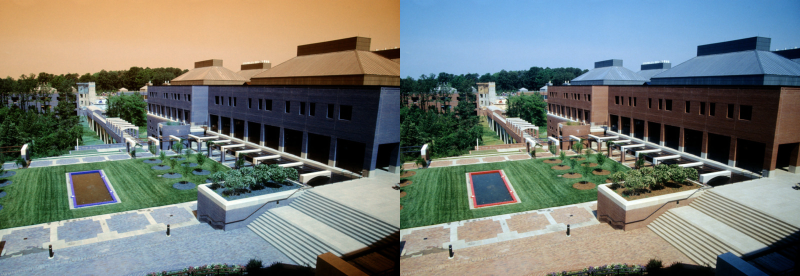

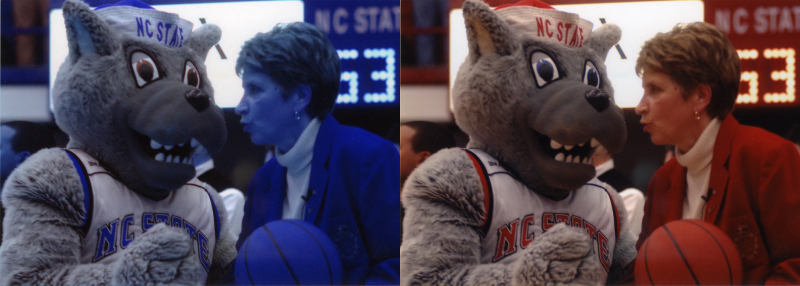

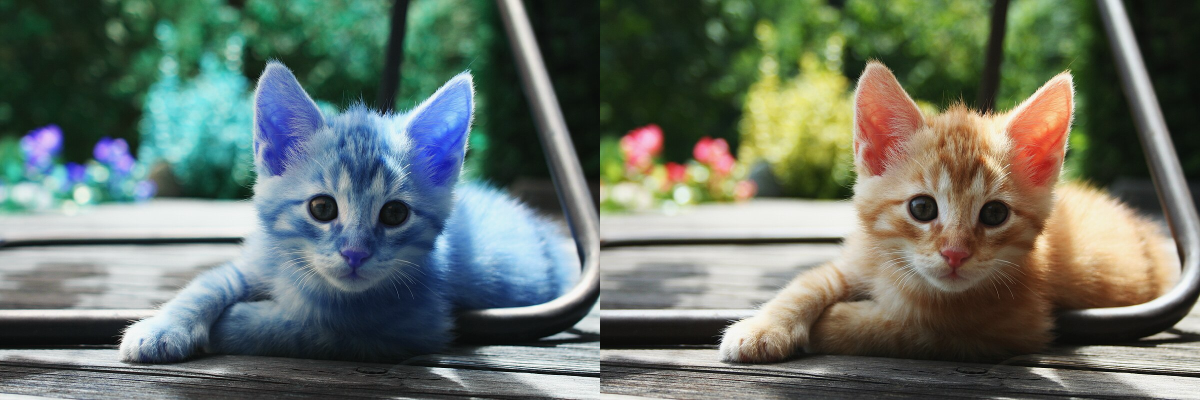

In [52]:
# Membuat list untuk menyimpan url dari beberapa image
urls = ["https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg","https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg", "https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Red_Kitten_01.jpg/1200px-Red_Kitten_01.jpg"]

# baca dan tampilkan image
# loop pada tiap url image, beberapa image dapat disimpan pada list
for url in urls:
  image = io.imread(url)
  image = cv.resize(image, (0,0), fx=0.5, fy=0.5)
  image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  final_frame = cv.hconcat((image, image_2))
  cv2_imshow(final_frame)
  print('\n')

resolusi image: tinggi x lebar =  286  x  400


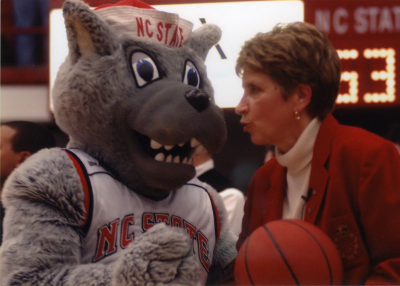

In [4]:
tinggi = image_2.shape[0]
lebar = image_2.shape[1]
print("resolusi image: tinggi x lebar = ",tinggi," x ",lebar)
cv2_imshow(image_2)

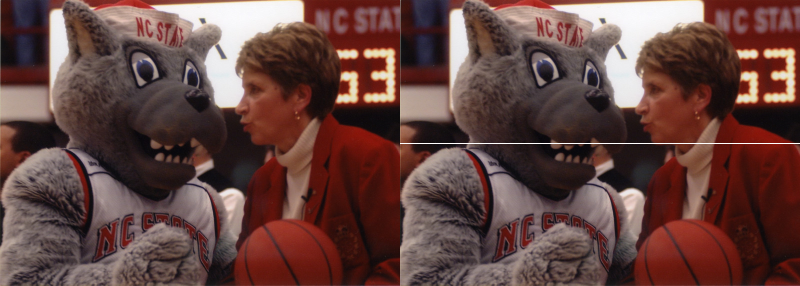

In [5]:
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# membuat garis horizontal di tengah image
for y in range (lebar):
  image_3[int((tinggi)/2),y] = [255,255,255]

final_frame = cv.hconcat((image_2, image_3))
cv2_imshow(final_frame)

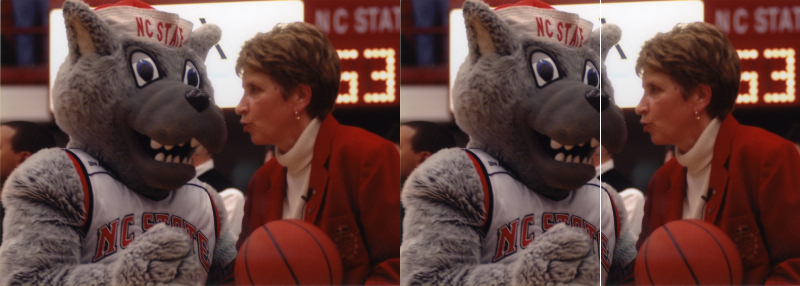

In [10]:
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# membuat garis horizontal di tengah image
for x in range (tinggi):
  image_3[x, int((lebar)/2)] = [255,255,255]

final_frame = cv.hconcat((image_2, image_3))
cv2_imshow(final_frame)

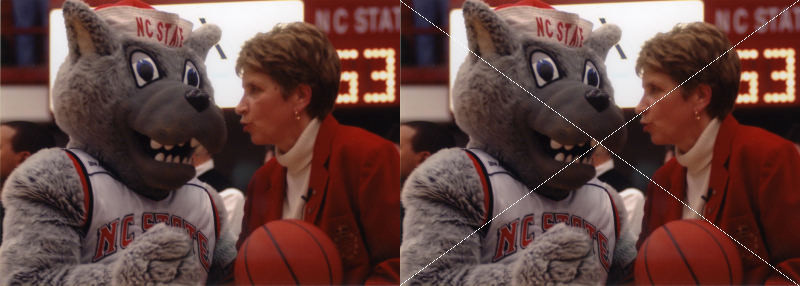

In [36]:
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# membuat garis horizontal di tengah image
# Garis diagonal dari kiri atas ke kanan bawah
for i in range(min(tinggi, lebar)):
    image_3[i, int(i * lebar / tinggi)] = [255, 255, 255]

# Garis diagonal dari kiri bawah ke kanan atas
for i in range(min(tinggi, lebar)):
    image_3[tinggi - 1 - i, int(i * lebar / tinggi)] = [255, 255, 255]


final_frame = cv.hconcat((image_2, image_3))
cv2_imshow(final_frame)

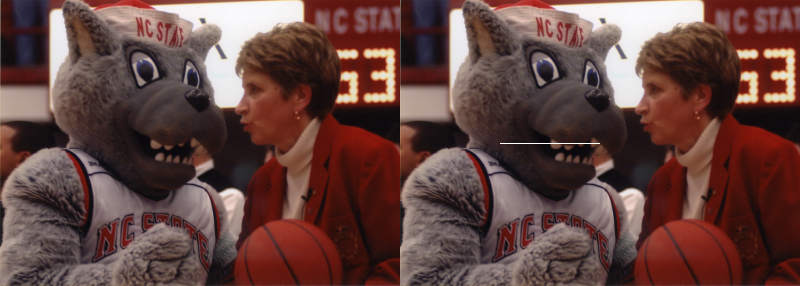

In [47]:
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

line_length = 100

shift_left = 50

start_x = (lebar - line_length) // 2 - shift_left
end_x = start_x + line_length

start_x = max(0, start_x)
end_x = min(lebar, end_x)

for y in range(start_x, end_x):
    image_3[int(tinggi / 2), y] = [255, 255, 255]

final_frame = cv.hconcat((image_2, image_3))
cv2_imshow(final_frame)

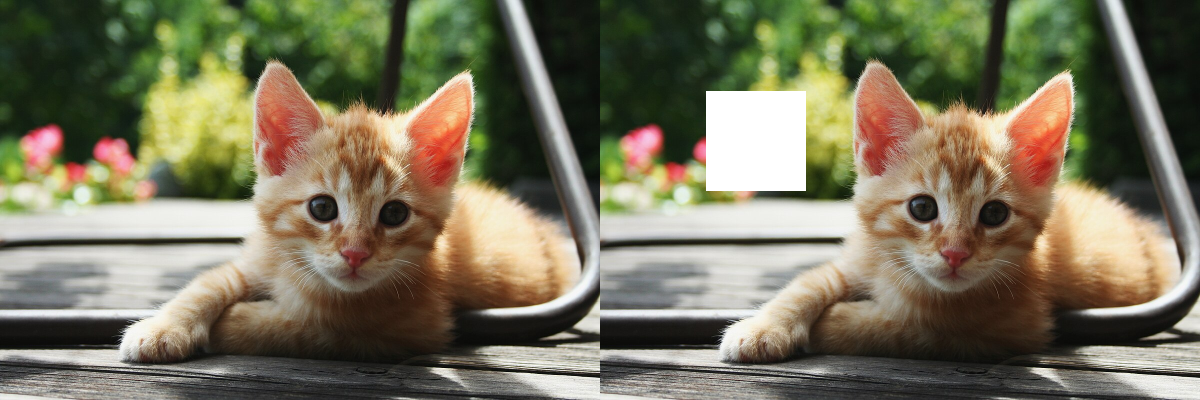

In [58]:
import random

# Convert the image to RGB format
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Define the size of the box
box_width = 100  # Width of the box in pixels
box_height = 100  # Height of the box in pixels

# Generate random top-left corner position for the box
top_left_x = random.randint(0, lebar - box_width)
top_left_y = random.randint(0, tinggi - box_height)

# Draw the white box
for x in range(top_left_x, top_left_x + box_width):
    for y in range(top_left_y, top_left_y + box_height):
        image_3[y, x] = [255, 255, 255]

# Concatenate the original and modified images side by side
final_frame = cv.hconcat([image_2, image_3])

# Display the result
cv2_imshow(final_frame)